## Исследование данных о российском кинопрокате

Министерство культуры Российской Федерации просит изучить рынок российского кинопроката и выявить текущие тренды. Особое внимание уделить фильмам с гос поддержкой и ответить на сколько они интересны.

Данные, опубликованны на [портале открытых данных Министерства культуры](http://opendata.mkrf.ru). Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

**Описание данных**

- `mkrf_movies.csv`
    - `title` — название фильма
    - `puNumber` — номер прокатного удостоверения
    - `show_start_date` — дата премьеры фильма
    - `type` — тип фильма
    - `film_studio` — студия-производитель
    - `production_country` — страна-производитель
    - `director` — режиссёр
    - `producer` — продюсер
    - `age_restriction` — возрастная категория
    - `refundable_support` — объём возвратных средств государственной поддержки
    - `nonrefundable_support` — объём невозвратных средств государственной поддержки
    - `financing_source` — источник государственного финансирования
    - `budget` — общий бюджет фильма
    - `ratings` — рейтинг фильма на КиноПоиске
    - `genres` — жанр фильма

- `mkrf_shows.csv`
    - `puNumber` — номер прокатного удостоверения
    - `box_office` — сборы в рублях

In [1]:
# Подключение библиотек
import pandas as pd
import numpy as np

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

Подсказка:  
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.

In [2]:
movies = pd.read_csv('/datasets/mkrf_movies.csv')
shows = pd.read_csv('/datasets/mkrf_shows.csv')

#### Изучаем исходные датасеты

In [3]:
movies.info()
movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
shows.info()
shows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


In [6]:
movies['puNumber'].dtypes

dtype('O')

In [7]:
movies['puNumber'].unique()

array(['221048915', '111013716', '221038416', ..., '124010819',
       '124010619', '124010719'], dtype=object)

In [8]:
d = movies[~movies['puNumber'].str.isnumeric()]
d

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
d.loc[804, 'puNumber']

' 111004112'

In [10]:
movies.loc[804, 'puNumber'] = int(d.loc[804, 'puNumber'])

In [11]:
d.loc[804, 'puNumber']

' 111004112'

In [12]:
d.loc[1797, 'puNumber']

'нет'

In [13]:
movies = movies.drop(1797)

In [14]:
movies['puNumber'] = movies['puNumber'].astype(int)

In [15]:
df = movies.merge(shows, on='puNumber', how='outer')
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
len(df['puNumber'].unique()), len(movies['puNumber'].unique())

(7483, 7483)

Количество строк осталось таким же как в исходных данных как и ожидалось

In [17]:
len(df.columns), len(movies.columns)

(16, 15)

Количество колонок увеличелось на одну `box_office` как и ожидалось

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Типы данных и кол-во не нулевых значений не изменились как и ожидалось

In [19]:
df = df.astype({
    'title': str,
    'show_start_date': 'datetime64[ns]',
    'type': str,
    'film_studio': str,
    'production_country': str,
    'director': str,
    'producer': str,
    'age_restriction': str,
    'refundable_support': float,
    'nonrefundable_support': float,
    'budget': float,
    'ratings': str,
    'genres': str,
    'box_office': float
})

In [20]:
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,nan,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,nan,nan,NaN
7481,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,nan,nan,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,nan,nan,NaN


In [21]:
df_copy = df.copy()

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

##### Название

In [22]:
df['title'].unique()

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

In [23]:
len(df['title'].unique())

6771

In [24]:
df['title'] = df['title'].str.lower().str.strip()

In [25]:
len(df['title'].unique())

6761

##### Прокатное удостоверение

In [26]:
df['puNumber'].unique()

array([221048915, 111013716, 221038416, ..., 124010819, 124010619,
       124010719])

In [27]:
len(df[df['puNumber'] == 'nan'])

0

In [28]:
df['puNumber'].dtypes

dtype('int64')

##### Дата премьеры

In [29]:
df['show_start_date'].sort_values()

4455   2010-01-11 12:00:00
4331   2010-01-13 12:00:00
4465   2010-01-13 12:00:00
4408   2010-01-14 12:00:00
4333   2010-01-14 12:00:00
               ...        
7478   2019-12-26 12:00:00
7466   2019-12-27 12:00:00
7482   2019-12-28 12:00:00
7483   2019-12-30 12:00:00
7484   2019-12-30 12:00:00
Name: show_start_date, Length: 7485, dtype: datetime64[ns]

In [30]:
df['show_start_date'].unique()

array(['2015-11-27T12:00:00.000000000', '2016-09-13T12:00:00.000000000',
       '2016-10-10T12:00:00.000000000', ...,
       '2019-12-24T12:00:00.000000000', '2019-12-28T12:00:00.000000000',
       '2019-12-30T12:00:00.000000000'], dtype='datetime64[ns]')

##### Тип

In [31]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [32]:
df['type'] = df['type'].str.lower().str.strip()

In [33]:
df['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

##### Студия

In [34]:
df['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [35]:
len(df['film_studio'].unique())

5491

In [36]:
df['film_studio'] = df['film_studio'].str.lower().str.strip()

In [37]:
len(df['film_studio'].unique())

5423

Найдём явные дубликаты

In [38]:
len(df[df['film_studio'].duplicated()])

2062

Найдём неявные дубликаты.

Посмотрим подробнее какие значения могут быть.

In [39]:
film_studio = list(df['film_studio'].unique())
film_studio

['тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз',
 'киностудия "мосфильм"',
 'юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз',
 'юнайтед артистс, грин стрит филмз, айкон интертейнмент интернэшнл',
 'пульсар продюксьон, тф1 фильм',
 'киностудия "мосфильм", телевидение внр',
 'кеннеди/маршал компани, юниверсал пикчерз, гипнотик, калима продакшнз, лудлум интертейнмент',
 'уорнер бразерс, лейкшор интертейнмент, малпасо продакшнз, альберт с.рудди продакшнз',
 'потбойлер продакшнз, эпсилон моушн пикчерз, скайон филмз лимитед, юк филм каунсил',
 'кэтлей, отель продакшнс, мунстоун интертейнмент, рэд маллет продакшнс',
 'инишиэл интертейнмент групп, мирамакс филмз, персистент интертейнмент, революшн студиос, зе лэдд компани',
 'фильмове студио баррандов',
 'вэ и пэ медиенфондс 3, асендант пикчерз, сатурн филмз, райзинг стар, эндгейм интертейнмент, интертейнмент мэньюфэкчуринг компани, ри

В каждой строке возьмём список студий, отсортируем их и снова проверим на количество дубликатов

In [40]:
def normalize_film_studio(value):
    return ','.join(sorted(value.split(',')))

In [41]:
len(df[df['film_studio'].apply(normalize_film_studio).duplicated()])

2062

Количество не изменилось значит дубликатов нет

##### Страна производства

In [44]:
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [45]:
len(df['production_country'].unique())

951

In [46]:
df['production_country'] = df['production_country'].str.lower().str.strip()

In [47]:
len(df['production_country'].unique())

934

Найдём неявные дубликаты

В каждой строке возьмём список стран, отсортируем их и снова проверим на количество дубликатов

In [48]:
def normalize_production_country(value):
    res = [r.split('-') for r in value.split(',')]
    res = [el.strip() for r in res for el in r]
    return ','.join(sorted([r.strip() for r in res]))

In [49]:
df['production_country'] = df['production_country'].apply(normalize_production_country)

In [50]:
len(df['production_country'].unique())

675

Неявные дубликаты были. Они заключались в формате и порядке стран в значении. Теперь строки приведены к нормированному виду.

In [51]:
df['production_country'].unique()[10:20]

array(['германия,сша', 'великобритания,сша', 'великобритания',
       'мексика,сша,франция', 'казахстан,россия,сша', 'ссср,швеция',
       'англия,гдр,куба,ссср,франция', 'германия',
       'великобритания,германия,кнр,сша', 'западный берлин,пнр,ссср,чсср'],
      dtype=object)

##### Режиссёр

In [52]:
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [53]:
len(df['director'].unique())

4812

In [54]:
df['director'] = df['director'].str.lower().str.strip()

In [55]:
len(df['director'].unique())

4797

In [56]:
df.loc[df['director'] == 'nan', 'director'] = 'неизвестно'

Выделим главного режисёра и нормализуем значения. Проверим на неявные дубликаты

In [57]:
for i in range(len(df)):
    res = [r.split('-') for r in df.loc[i, 'director'].split(',')]
    res = [el.strip() for r in res for el in r]
    df.loc[i, 'main_director'] = res[0].strip().replace('  ', ' ')
    df.loc[i, 'director'] = ','.join(sorted([r.strip().replace('  ', ' ') for r in res]))

In [58]:
len(df['director'].unique())

4791

Неявные дубликаты были. Они заключались в формате и порядке режисёров в значении. Теперь строки приведены к нормированному виду.

##### Продюсор

In [62]:
df['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'nan',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [63]:
len(df['producer'].unique())

5350

In [64]:
df['producer'] = df['producer'].str.lower().str.strip()

In [65]:
len(df['producer'].unique())

5327

Нормализуем значения. Проверим на неявные дубликаты

In [66]:
df.loc[df['producer'] == 'nan', 'producer'] = 'неизвестно'

In [67]:
def normalize_producer(value):
    res = [r.split('-') for r in value.split(',')]
    res = [el.strip() for r in res for el in r]
    return ','.join(sorted([r.strip() for r in res]))

In [68]:
df['producer'] = df['producer'].apply(normalize_producer)
len(df['producer'].unique())

5296

##### Ограничение по возрасту

In [69]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [70]:
df['age_restriction'] = df['age_restriction'].str.extract('(\d+)').astype(int)

In [71]:
df['age_restriction'].unique()

array([18,  6, 12, 16,  0])

##### Источник финансирования

In [75]:
df.loc[df['financing_source'].isna(), 'financing_source'] = 'неизвестно'

##### Рейтинг

In [76]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', 'nan', '8.2', '7.5', '6.7', '7.9', '5.9', '6.2',
       '5.6', '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5',
       '5.1', '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4',
       '2.6', '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2',
       '4.7', '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4',
       '3.1', '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2',
       '3.4', '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%',
       '90%', '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2',
       '1.7', '9.0', '98%', '8.9', '9.1'], dtype=object)

In [77]:
df['ratings'] = df['ratings'].apply(lambda x: int(x[:-1])/10 if x[-1:] == '%' else x)

In [82]:
df.loc[df['ratings'] == 'nan', 'ratings'] = np.nan

In [83]:
df['ratings'] = df['ratings'].astype(float)

In [84]:
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

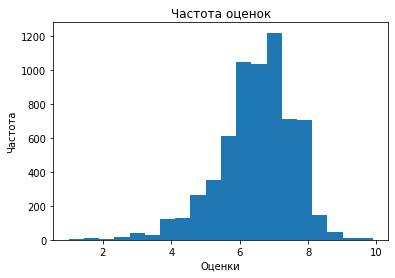

In [85]:
ax = df['ratings'].plot.hist(bins=20, title='Частота оценок');
ax.set_xlabel("Оценки");
ax.set_ylabel("Частота");

In [92]:
f"Доля пропусков: {len(df[df['ratings'].isna()])} из {len(df)} ({len(df[df['ratings'].isna()]) / len(df):.2%})"

'Доля пропусков: 966 из 7485 (12.91%)'

Если избавится от данных они могут повляять на резульаты. Возьмём медианное значение рейтинга по странам и заполним недостающие значения у других их фильмов. Оставшиеся удалим.

In [93]:
df['ratings'] = df['ratings'].fillna(df.groupby('production_country')['ratings'].transform('median'))

In [94]:
len(df[df['ratings'].isna()])

68

In [95]:
df = df.dropna(subset=['ratings']).reset_index(drop=True)

In [96]:
len(df[df['ratings'].isna()])

0

##### Жанры

In [97]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'nan', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,м

In [98]:
len(df['genres'].unique())

743

In [99]:
df.loc[df['genres'] == 'nan', 'genres'] = 'неизвестно'

In [100]:
for i in range(len(df)):
    res = [r.strip() for r in df.loc[i, 'genres'].split(',')]
    df.loc[i, 'main_genre'] = res[0]
    df.loc[i, 'genres'] = ','.join(sorted(res))

In [101]:
len(df['genres'].unique())

474

##### Сборы

In [103]:
df.loc[df['box_office'] == 0, 'box_office'] = np.nan

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Сделал выше

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Сделал выше.

In [104]:
df[df.duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre


Явных дубликатов нет.

In [105]:
filter_duplicated_puNumber = df.duplicated(subset=["puNumber"])
df.loc[filter_duplicated_puNumber]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre
4591,иоанна - женщина на папском престоле /по роману донны вулфольк кросс/,221154310,2010-12-17 12:00:00,художественный,"константин фильм, а эр ди дегето фильм, дюне филис, икури филмз, медуза фильм, у эф а интернэшнл...","великобритания,германия,испания,италия",зенке вортманн,"дорис д.хайнце,оливер бербен,фарук элтан",16,NaN,NaN,NaN,неизвестно,7.6,"драма,история,мелодрама",NaN,зенке вортманн,драма
5020,анализируй то!,221054410,2010-05-25 12:00:00,художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи-пи интертейнмент, баалтимор спринг крик пикчерз ф...",сша,гарольд реймис,"джейн розенталь,паул уэйнстейн",12,NaN,NaN,NaN,неизвестно,6.8,"комедия,криминал",NaN,гарольд реймис,комедия


In [106]:
df[df["puNumber"] == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre
4590,как жениться и остаться холостым,221154310,2010-12-17 12:00:00,художественный,"ше вам, скрипт ассосье, тэ фэ 1 фильм продюксьон, марс дистрибусьон, канал +",франция,эрик лартиго,"алан шаба,амандин било",16,NaN,NaN,NaN,неизвестно,7.0,"комедия,мелодрама",NaN,эрик лартиго,мелодрама
4591,иоанна - женщина на папском престоле /по роману донны вулфольк кросс/,221154310,2010-12-17 12:00:00,художественный,"константин фильм, а эр ди дегето фильм, дюне филис, икури филмз, медуза фильм, у эф а интернэшнл...","великобритания,германия,испания,италия",зенке вортманн,"дорис д.хайнце,оливер бербен,фарук элтан",16,NaN,NaN,NaN,неизвестно,7.6,"драма,история,мелодрама",NaN,зенке вортманн,драма


In [107]:
df[df["puNumber"] == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre
5019,анализируй это!,221054410,2010-05-25 12:00:00,художественный,"уорнер бразерс, вилладж роудшоу филмз лтд","австралия,сша",хэрольд рэмис,"джейн розенталь,пола уейнстейн",16,NaN,NaN,NaN,неизвестно,7.4,"комедия,криминал",NaN,хэрольд рэмис,комедия
5020,анализируй то!,221054410,2010-05-25 12:00:00,художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи-пи интертейнмент, баалтимор спринг крик пикчерз ф...",сша,гарольд реймис,"джейн розенталь,паул уэйнстейн",12,NaN,NaN,NaN,неизвестно,6.8,"комедия,криминал",NaN,гарольд реймис,комедия


In [108]:
shows[shows["puNumber"] == 221154310]

,puNumber,box_office


In [109]:
shows[shows['puNumber'] == 221054410]

,puNumber,box_office


In [110]:
# Удаление дубликатов
df = df.loc[~filter_duplicated_puNumber]

In [111]:
df[df.duplicated(subset=["puNumber"])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

Подсказка:  
В поле `type` есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:  
`df['type'].str.strip()`

Сделал выше

Проблемы в категориальных столбцах
- разный регистр
- пробелы на концах строк
- значения внутри строки имеют разный разделитель
- порядок значений внутри строки не отсортирован что не даёт возможности точно проверить тот же состав значений
- среди внутренних значений могут быть неявные дубликаты

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

Подсказка:  
Обратите внимание на описание столбца `budget`. Как этот столбец соотносится с двумя другими: `refundable_support` и `nonrefundable_support`?

Бывает ли так что поддержка больше бюджета? Чего не должно быть.

In [112]:
df[(df['refundable_support'] + df['nonrefundable_support']) > df['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre
2042,14+,111023614,2014-12-19 12:00:00,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"а.зайцев,о.гранина",16,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,а.зайцев,мелодрама
2047,дуxless 2,111000415,2015-01-26 12:00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"д.рудовский,п.ануров,ф.бондарчук",16,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08,р.прыгунов,драма
2456,воин (2015),111017315,2015-09-28 12:00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",12,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,а.андрианов,боевик
2510,бармен.,111009615,2015-05-26 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,16,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,д.штурманова,комедия
2593,савва. сердце воина,114001715,2015-07-21 12:00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,6,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,м.фадеев,мультфильм
2659,тряпичный союз,111010215,2015-06-08 12:00:00,художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"а.кушаев,р.борисевич",18,0.0,59000000.0,0.0,Фонд кино,6.3,"драма,комедия",1.957739e+06,м.местецкий,комедия
2761,срочно выйду замуж,111017115,2015-09-30 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"д.рудовский,т.вайнштейн,ф.бондарчук",16,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,с чекалов,комедия
2845,помню - не помню!,111004916,2016-03-01 12:00:00,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",12,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07,в.ровенский,комедия
3010,любовь с ограничениями,111008216,2016-04-29 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"д.рудовский,т.вайнштейн,ф.бондарчук",16,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,д.тюрин,комедия
3522,притяжение (2016),111018116,2016-12-16 12:00:00,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",12,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09,ф.бондарчук,фантастика


Да. Все нули. Посчитаем сумму финансирования и добавим к бюджету

In [113]:
df.loc[(df['refundable_support'] + df['nonrefundable_support']) > df['budget'], 'budget'] = df['refundable_support'] + df['nonrefundable_support']

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [114]:
df['year'] = df['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Подсказка:  
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 

Сделал выше.

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [115]:
df['gos_sup'] = ((df['refundable_support'] + df['nonrefundable_support']) / df['budget'])
df['gos_sup_sum'] = df['refundable_support'] + df['nonrefundable_support']

In [116]:
df['gos_sup'].median()

0.6126906414592734

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [117]:
films_by_year = df.pivot_table(index='year', values='title', aggfunc='count')
films_by_year

,title
year,
2010,980
2011,622
2012,591
2013,625
2014,803
2015,684
2016,807
2017,499
2018,887


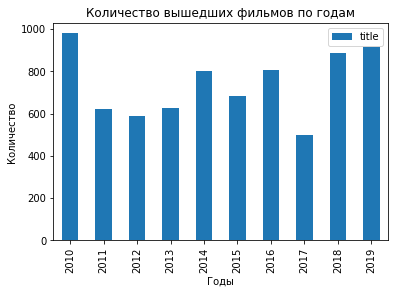

In [118]:
ax = films_by_year.plot.bar(title='Количество вышедших фильмов по годам');
ax.set_xlabel("Годы");
ax.set_ylabel("Количество");

In [119]:
d = df.loc[df['box_office'] > 0, 'box_office'].count() / len(df)
print(f'Доля фильмов с указанной информацией о прокате: {d:.2%}')

Доля фильмов с указанной информацией о прокате: 41.70%


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [120]:
box_office_by_year = df.pivot_table(index='year', values='box_office', aggfunc='sum')
box_office_by_year

,box_office
year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.443155e+09
2015,3.944109e+10
2016,4.785876e+10
2017,4.855988e+10
2018,4.966748e+10


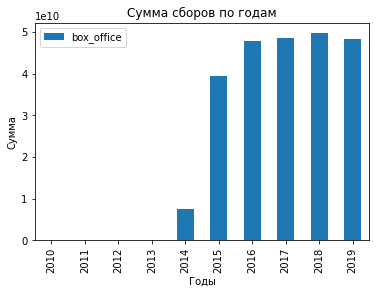

In [121]:
ax = box_office_by_year.plot.bar(title='Сумма сборов по годам');
ax.set_xlabel("Годы");
ax.set_ylabel("Сумма");

In [122]:
bo_desc = box_office_by_year.describe()
bo_desc

,box_office
count,1.000000e+01
mean,2.414364e+10
std,2.413163e+10
min,2.428654e+06
25%,1.802700e+07
50%,2.344212e+10
75%,4.827423e+10
max,4.966748e+10


In [123]:
print('Минимум:', bo_desc['box_office']['min'], '(2010 год)')
print('Максимум:', bo_desc['box_office']['max'], '(2018 год)')

Минимум: 2428654.0 (2010 год)
Максимум: 49667476012.31999 (2018 год)


Может так случится что кол-во сборов больше за счёт большего количества показов. А значит по общим сборам будет не корректно судить о том за счёт чего они увеличились.

In [124]:
box_office_count = df[df['box_office'] > 0].pivot_table(index='year', values='box_office', aggfunc='count')
box_office_count

,box_office
year,
2010,101
2011,109
2012,123
2013,179
2014,272
2015,445
2016,515
2017,353
2018,473


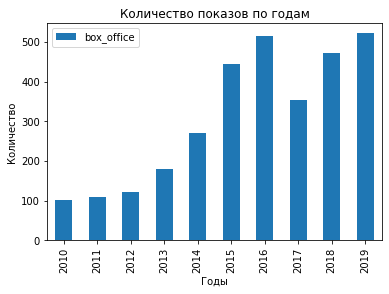

In [125]:
ax = box_office_count.plot.bar(title='Количество показов по годам');
ax.set_xlabel("Годы");
ax.set_ylabel("Количество");

Кол-во фильмов со сборами росло с 105 (2010 год) по 525 (2016 год). В 2017 год сильно просело до 357. В 2018 году вернулось к показателям 2015-ого, а в 2019 к показателям 2016-ого.

Разделим сборы на количество фильмов.

In [126]:
box_office_by_year_cf = box_office_by_year['box_office'] / box_office_count['box_office']
box_office_by_year_cf

year
2010    2.404608e+04
2011    1.293832e+05
2012    5.654815e+04
2013    1.664788e+05
2014    2.736454e+07
2015    8.863166e+07
2016    9.292963e+07
2017    1.375634e+08
2018    1.050052e+08
2019    9.274468e+07
Name: box_office, dtype: float64

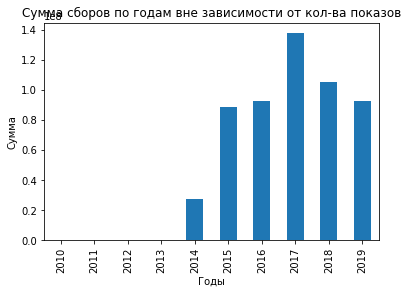

In [127]:
ax = box_office_by_year_cf.plot.bar(title='Сумма сборов по годам вне зависимости от кол-ва показов');
ax.set_xlabel("Годы");
ax.set_ylabel("Сумма");

С 2010 по 2014 было сборы были незначительны в отличчи от периода с 2015 по 2019, скорее всего из за отсутствия данных. В 2017 году несмотря на то что он сильно проседает по показам, сборы на один фильм были самыми большими.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [128]:
boyear = df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
boyear

,mean,median
,box_office,box_office
year,,
2010,2.404608e+04,1710.00
2011,1.293832e+05,3000.00
2012,5.654815e+04,6220.00
2013,1.664788e+05,3580.00
2014,2.736454e+07,20310.00
2015,8.863166e+07,5831860.30
2016,9.292963e+07,4206711.50
2017,1.375634e+08,10495889.00


In [129]:
df['box_office'].describe()

count    3.092000e+03
mean     7.808421e+07
std      2.426512e+08
min      4.000000e+01
25%      9.376950e+04
50%      2.462083e+06
75%      2.551465e+07
max      3.073569e+09
Name: box_office, dtype: float64

Разница между средними и медианными значениям с 2010-2014 обусловлена недостаточным количеством данных. С 2015 по 2019 тем, что объём сборов сильно различается между фильмами

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [130]:
age_by_year_box = df.query('2015 <= year <= 2019').pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc=['mean', 'count'])
age_by_year_box

mean                                            \
age_restriction            0             6             12            16   
year                                                                      
2015             1.238414e+07  1.641849e+08  1.917720e+08  6.847482e+07   
2016             3.753562e+06  1.746645e+08  1.506688e+08  9.465886e+07   
2017             1.143286e+08  2.685809e+08  1.914982e+08  1.575133e+08   
2018             6.489800e+06  1.486026e+08  2.129447e+08  1.064724e+08   
2019             5.915356e+06  1.606449e+08  1.527557e+08  7.285590e+07   

                              count                    
age_restriction            18    0   6   12   16   18  
year                                                   
2015             4.259764e+07    28  53  71  166  127  
2016             4.558813e+07    40  69  81  176  149  
2017             6.609301e+07     2  45  41  119  146  
2018             4.921093e+07     5  68  67  155  178  
2019             5.588333e+07     3  80  83  175  181

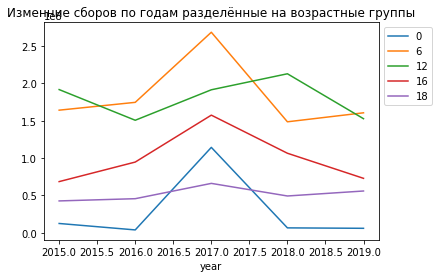

In [131]:
age_by_year_box['mean'].plot(title='Изменние сборов по годам разделённые на возрастные группы').legend(bbox_to_anchor=(1, 1));

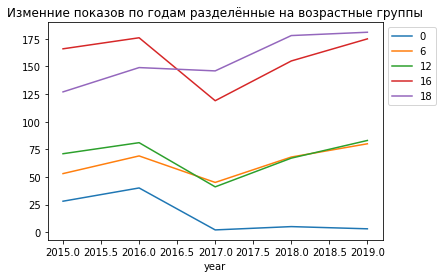

In [132]:
age_by_year_box['count'].plot(title='Изменние показов по годам разделённые на возрастные группы').legend(bbox_to_anchor=(1, 1));

In [133]:
age_by_year_box['mean'].sum(axis=0).sort_values()

age_restriction
0     1.428714e+08
18    2.593730e+08
16    4.999752e+08
12    8.996394e+08
6     9.166778e+08
dtype: float64

Да возрастная группа влияет на сборы. По возрастающей: "0+", "18+", "16+", "12+", "6+"

В среднем есть колебания и незначительный тренд вниз. Возможно это связано с увеличением показов в онлайн формате вместо кинотеатров.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [134]:
gos_sup_df = df.loc[df['financing_source'] != 'неизвестно']
non_gos_sup_df = df.loc[df['financing_source'] == 'неизвестно']
gos_sup_df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,main_director,main_genre,year,gos_sup,gos_sup_sum
1279,пока еще жива,111005313,2013-10-11 12:00:00,художественный,"ано содействия развитию кинематографии ""ангел-фильм"", ооо ""кинокомпания отражение""",россия,а.атанесян,"а.атанесян,м.бабаханов,р.бутко",16,0.0,...,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,а.атанесян,драма,2013,0.333703,26500000.0
1446,бесславные придурки,111003314,2014-03-28 12:00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,12,0.0,...,37142857.0,Министерство культуры,6.3,неизвестно,2.814000e+04,а.якимчук,неизвестно,2014,0.700000,26000000.0
1495,невидимки,111004213,2013-09-10 12:00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров,с.комаров","а.котелевский,а.олейников,р.давлетьяров",12,0.0,...,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,р.давлетьяров,комедия,2013,0.612691,107847945.0
1521,берцы,111004314,2014-05-05 12:00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,16,0.0,...,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,е.миндадзе (псевдоним катя шагалова),драма,2014,0.690095,28000000.0
1785,братья ч,111004414,2014-04-23 12:00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе,л.антонова",16,0.0,...,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,м.угаров,драма,2014,0.624764,25000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,союз спасения,111022019,2019-12-26 12:00:00,художественный,"зао ""дирекция кино""",россия,а.кравчук,"а.максимов,к.эрнст",12,100000000.0,...,980000000.0,Фонд кино,6.0,"биография,драма,история",7.177032e+08,а.кравчук,история,2019,0.510204,500000000.0
7397,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00,анимационный,"ооо ""студия анимационного кино ""мельница""",россия,"д.шмидт,к.феоктистов","а.боярский,с.сельянов",6,100000000.0,...,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,д.шмидт,мультфильм,2019,0.526316,100000000.0
7405,вторжение,111022519,2019-12-23 12:00:00,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",россия,ф.бондарчук,"а.андрющенко,д.рудовский,м.врубель,ф.бондарчук",12,100000000.0,...,944000000.0,Фонд кино,5.7,"боевик,фантастика",NaN,ф.бондарчук,фантастика,2019,0.529661,500000000.0
7407,я свободен,111023019,2019-12-26 12:00:00,художественный,"ао ""тпо ""киностудия им. м.горького""",россия,и.северов,с.зернов,12,0.0,...,46154000.0,Министерство культуры,5.9,драма,NaN,и.северов,драма,2019,0.649998,30000000.0


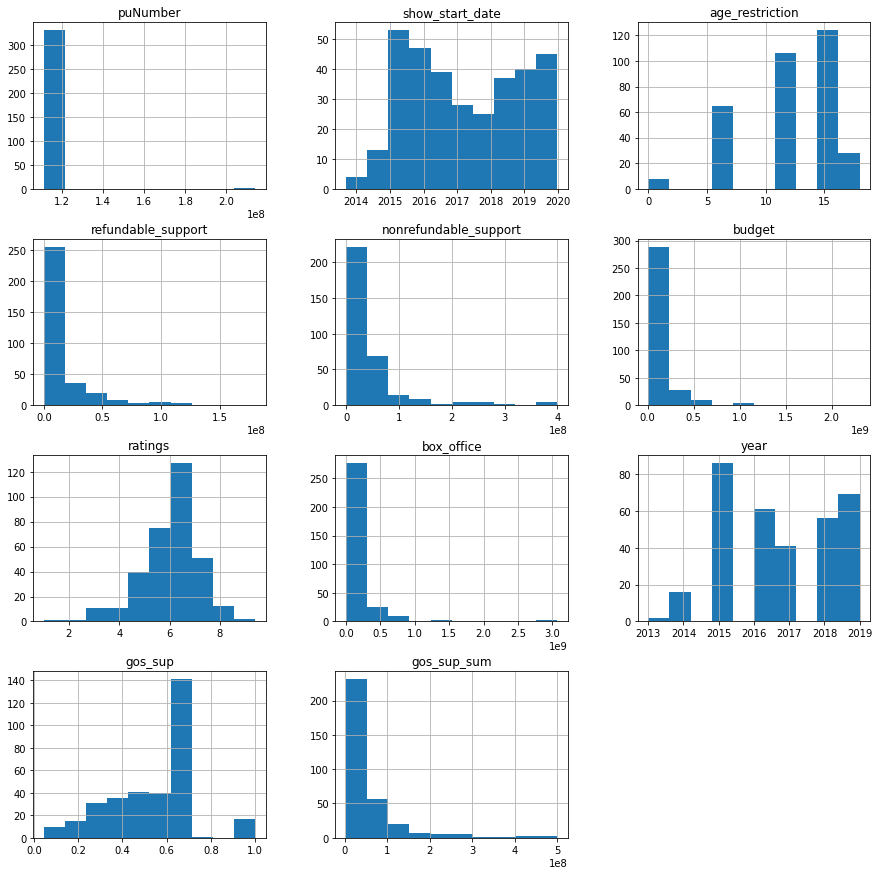

In [135]:
gos_sup_df.hist(figsize=(15, 15));

#### Минимум и максимум

In [136]:
gos_sup_df[gos_sup_df['budget'] == gos_sup_df['budget'].min()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,main_director,main_genre,year,gos_sup,gos_sup_sum
2845,помню - не помню!,111004916,2016-03-01 12:00:00,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",12,0.0,...,6000000.0,Министерство культуры,4.3,комедия,15362931.43,в.ровенский,комедия,2016,1.0,6000000.0


Фильм с минимальным бюджетом: Помню - не помню!

In [137]:
gos_sup_df[gos_sup_df['budget'] == gos_sup_df['budget'].max()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,main_director,main_genre,year,gos_sup,gos_sup_sum
7051,тайна печати дракона,111012819,2019-09-12 12:00:00,художественный,"ооо ""кинокомпания ""ств""; ооо ""рфг корп""; ооо ""рфг""; ао ""маринс групп интертеймент""; ооо ""фетисов...","китай,россия",о.степченко,"а.петрухин,с.сельянов",6,180000000.0,...,2.305074e+09,Фонд кино,5.8,"приключения,фэнтези",3.335971e+08,о.степченко,приключения,2019,0.117133,270000000.0


Фильм с максимально большим бюджетом: Тайна печати дракона (С Джеки Чаном! 🤩)

<img width=720 src="https://images.kinorium.com/movie/shot/776124/w1500_37855428.jpg"></div> 

In [138]:
x = gos_sup_df[gos_sup_df['box_office'] > 0]
x[x['box_office'] == x['box_office'].min()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,main_director,main_genre,year,gos_sup,gos_sup_sum
3111,я-учитель,111019715,2015-12-02 12:00:00,художественный,"нп киностудия детских и юношеских фильмов ""илья муромец""",россия,с.мокрицкий,а.ковтунец,12,0.0,...,91000000.0,Министерство культуры,7.4,"комедия,мелодрама",1550.0,с.мокрицкий,мелодрама,2015,0.384615,35000000.0


Фильм с минимальными сборами: Я-учитель

In [139]:
gos_sup_df[gos_sup_df['box_office'] == gos_sup_df['box_office'].max()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,main_director,main_genre,year,gos_sup,gos_sup_sum
7387,холоп,111021719,2019-12-19 12:00:00,художественный,"ооо ""мем-медиа"" по заказу ао ""вбд груп""",россия,к.шипенко,"а.кушаев,а.троцюк,в.верещагин,в.дусмухаметов,в.шляппо,д.жалинский,р.минасбекян,т.бадзиев,э.илоян",12,25000000.0,...,160000000.0,Фонд кино,6.8,комедия,3.073569e+09,к.шипенко,комедия,2019,0.375,60000000.0


Фильм с максимальными сборами: Холоп (Захотелось посмотреть 😲)

In [140]:
gos_sup_df[gos_sup_df['ratings'] == gos_sup_df['ratings'].min()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,main_director,main_genre,year,gos_sup,gos_sup_sum
3473,взломать блогеров,111016616,2016-10-28 12:00:00,художественный,"ооо ""таббак""",россия,м.свешников,т.бекмамбетов,6,0.0,...,36016269.0,Фонд кино,1.0,"комедия,мультфильм,фантастика",7323648.0,м.свешников,комедия,2016,0.694131,25000000.0


Фильм с минимальным рейтингом: Взломать блогеров

In [141]:
gos_sup_df[gos_sup_df['ratings'] == gos_sup_df['ratings'].max()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,main_director,main_genre,year,gos_sup,gos_sup_sum
2133,главный,111003415,2015-03-27 12:00:00,художественный,"ооо ""киностудия ""мастер""",россия,ю.кара,ю.кара,6,0.0,...,40000000.0,Министерство культуры,9.4,"боевик,комедия,фантастика",334750.0,ю.кара,фантастика,2015,0.25,10000000.0


Фильм с максимальным рейтингом: Главный

#### Окупаемость

In [142]:
all_sup = (gos_sup_df['gos_sup_sum']).sum()
all_budget = gos_sup_df['budget'].sum()
all_box = gos_sup_df['box_office'].sum()
print('За период с 2014 по 2019')
print('Гос поддержка:', all_sup, 'рублей')
print('Бюджет:', all_budget, 'рублей')
print('Сборы:', all_box, 'рублей')
print('Окупаемость:', f'{all_box / all_budget:.2%}', '(не окупилась)')

За период с 2014 по 2019
Гос поддержка: 20170688312.0 рублей
Бюджет: 43584501354.0 рублей
Сборы: 42113509574.78 рублей
Окупаемость: 96.62% (не окупилась)


#### Топ

Вклад разных источников финансирования.

In [143]:
gos_sup_df.pivot_table(index='financing_source', values='gos_sup_sum', aggfunc='sum')

,gos_sup_sum
financing_source,
Министерство культуры,4.806661e+09
"Министерство культуры, Фонд кино",1.185431e+09
Фонд кино,1.417860e+10


Узнаем медианный рейтинг каждого жанра

In [144]:
genre_rating = gos_sup_df.pivot_table(index='main_genre', values='ratings', aggfunc='median').sort_values(by='ratings', ascending=False)
genre_rating

,ratings
main_genre,
криминал,7.80
детский,7.25
спорт,7.00
биография,6.90
фэнтези,6.80
детектив,6.80
мюзикл,6.60
боевик,6.45
драма,6.40


Узнаем какие жанры собирают больше всего сборов

In [145]:
genre_box = gos_sup_df.pivot_table(index='main_genre', values='box_office', aggfunc='median').sort_values(by='box_office', ascending=False)
genre_box

,box_office
main_genre,
история,3.642840e+08
спорт,1.686889e+08
приключения,1.157387e+08
биография,1.140902e+08
мультфильм,9.494031e+07
семейный,7.627662e+07
фантастика,5.501978e+07
боевик,4.468175e+07
реальное ТВ,3.272110e+07


In [146]:
gos_sup_df['ratings'].median(), non_gos_sup_df['ratings'].median()

(6.2, 6.6)

В целом фильмы с гос поддержкой нравятся людям незначительно меньше, чем все остальные

### Шаг 5. Напишите общий вывод

Доля фильмов с указанной информацией о прокате: 41.72%

сумма сборов
Минимум: 2428654 (2010 год)
Максимум: 49667476012 (2018 год)

Кол-во фильмов со сборами росло с 105 (2010 год) по 525 (2016 год). В 2017 год сильно просело до 357. В 2018 году вернулось к показателям 2015-ого, а в 2019 к показателям 2016-ого.

С 2010 по 2014 было сборы были незначительны в отличии от периода с 2015 по 2019, скорее всего из за отсутствия данных. В 2017 году несмотря на то что он сильно проседает по показам, сборы на один фильм были самыми большими.

Возрастная группа влияет на сборы. По возрастающей: "0+", "18+", "16+", "12+", "6+". В среднем есть колебания и незначительный общий тренд вниз. Возможно это связано с увеличением показов в онлайн формате вместо кинотеатров.

**Фильмы с гос поддержкой**

- Фильм с минимальным бюджетом: "Помню - не помню!"  
- Фильм с максимально большим бюджетом: "Тайна печати дракона"

- Фильм с минимальными сборами: "Я-учитель"  
- Фильм с максимальными сборами: "Холоп"

- Фильм с минимальным рейтингом: "Взломать блогеров"  
- Фильм с максимальным рейтингом: "Главный"

За период с 2014 по 2019:
- Гос поддержка: 20200688312 рублей
- Бюджет: 43632235404 рублей
- Сборы: 42113509482 рублей
- Окупаемость: 96.52% (не окупилась)

"Фонд кино" больше всего финансирует российское кино

**Вот что больше всего интересно людям**

Топ 5 самых высоких мединных оценок у жанров:

| жанр | рейтинг |
|:--|:-:|
| криминал | 7.80 |
| детский | 7.25 |
| спорт | 7.00 |
| биография | 6.90 |
| фэнтези | 6.80 |

Топ 5 самых успешных жанров по сборам:

| жанр | сборы |
|:--|:-:|
| история | 364283970 |
| спорт | 168688859 |
| биография | 114090162 |
| приключения | 104763979 |
| мультфильм | 83366328 |

Лучшее из обоих миров: спорт и биография.

В целом из представленных данных, фильмы с гос поддержкой нравятся людям незначительно меньше, чем все остальные